# Polynomial Regression Model

## import libs

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from scipy import stats
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## read data base

In [2]:
data = pd.read_csv('CLEANED_sobolsampling-2048.csv')
#print(f'{data}')
data = data.drop(data.columns[0], axis=1)
#data = data.transpose()
#print(f'{data}')

          SigC      SigH      EpsC      EpsH  density
0     0.329511  0.074231  1.036268  0.062599  891.797
1     0.193948  0.136800  0.751676  0.037376  664.747
2     0.230588  0.235899  0.596203  0.100129  682.448
3     0.242166  0.148891  0.406759  0.087550  688.667
4     0.128757  0.190416  0.989670  0.034993  660.728
...        ...       ...       ...       ...      ...
2000  0.128595  0.136526  0.645525  0.075425  651.258
2001  0.242035  0.235637  0.735539  0.137124  708.349
2002  0.230760  0.148096  1.005841  0.111508  714.162
2003  0.066912  0.095994  0.782125  0.108488  651.054
2004  0.329646  0.259110  0.444702  0.043977  707.088

[2005 rows x 5 columns]


## prepare data

In [3]:
X = data.drop('density', axis=1)
#print(f'{X}')

Y = data['density']
#print(f'{Y}')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.05, random_state=29)

          SigC      SigH      EpsC      EpsH
0     0.329511  0.074231  1.036268  0.062599
1     0.193948  0.136800  0.751676  0.037376
2     0.230588  0.235899  0.596203  0.100129
3     0.242166  0.148891  0.406759  0.087550
4     0.128757  0.190416  0.989670  0.034993
...        ...       ...       ...       ...
2000  0.128595  0.136526  0.645525  0.075425
2001  0.242035  0.235637  0.735539  0.137124
2002  0.230760  0.148096  1.005841  0.111508
2003  0.066912  0.095994  0.782125  0.108488
2004  0.329646  0.259110  0.444702  0.043977

[2005 rows x 4 columns]
0       891.797
1       664.747
2       682.448
3       688.667
4       660.728
         ...   
2000    651.258
2001    708.349
2002    714.162
2003    651.054
2004    707.088
Name: density, Length: 2005, dtype: float64


## create and train the model

In [13]:
## creation the pipeline
model = make_pipeline(PolynomialFeatures(degree=6), LinearRegression())

## train/fit the model
model.fit(X_train, Y_train)

## prediction using the test set
Y_prediction = model.predict(X_test)

## evaluate with Y_test
rmse = np.sqrt(mean_squared_error(Y_test, Y_prediction))
r2 = r2_score(Y_test, Y_prediction)
spearman_r = stats.spearmanr(Y_test, Y_prediction)

print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print(f'Spearman rank: {spearman_r}')

RMSE: 6.2136879256999125
R2: 0.9969470643783853
Spearman rank: SignificanceResult(statistic=0.9921258008153756, pvalue=3.844030208488575e-91)


### Results

**Degree 8:**
- RMSE: 7.230447578639616
- R2: 0.9958662031055541

**Degree 6:**
- RMSE: 6.2136879256999125
- R2: 0.9969470643783853


  genereally: 0 <= R2 <= 1, with R2 -> 1: better matching of Y_prediction to Y_test. Pretty good?
  how about higher/lower degrees?

## Test model with different/more data

### load more and prepare test data

In [5]:
testdata1 = pd.read_csv('CLEANED_gridsearch_1296.csv')
testdata2 = pd.read_csv('CLEANED_gridsearch_2401.csv')
#print(f'{testdata1}')
#print(f'{testdata2}')

testdata1 = testdata1.drop(testdata1.columns[0], axis=1)
testdata2 = testdata2.drop(testdata2.columns[0], axis=1)
#print(f'{testdata1}')
#print(f'{testdata2}')

X_testdata1 = testdata1.drop('density', axis=1)
X_testdata2 = testdata2.drop('density', axis=1)
#print(f'{X_testdata1}')
#print(f'{X_testdata2}')

Y_testdata1 = testdata1['density']
Y_testdata2 = testdata2['density']
#print(f'{Y_testdata1}')
#print(f'{Y_testdata2}')

### test model (seperated test data)

In [14]:
## prediction using the test sets
Y_prediction_testdata1 = model.predict(X_testdata1)
Y_prediction_testdata2 = model.predict(X_testdata2)

## evaluate with Y_testdata*
rmse_testdata1 = np.sqrt(mean_squared_error(Y_testdata1, Y_prediction_testdata1))
rmse_testdata2 = np.sqrt(mean_squared_error(Y_testdata2, Y_prediction_testdata2))
r2_testada1 = r2_score(Y_testdata1, Y_prediction_testdata1)
r2_testada2 = r2_score(Y_testdata2, Y_prediction_testdata2)

spearman_r_testdata1 = stats.spearmanr(Y_testdata1, Y_prediction_testdata1)
spearman_r_testdata2 = stats.spearmanr(Y_testdata2, Y_prediction_testdata2)


print(f'testdata1:')
print(f'RMSE: {rmse_testdata1}')
print(f'R2: {r2_testada1}')
print(f'Spearman rank: {spearman_r_testdata1}')
print(f'')
print(f'testdata2:')
print(f'RMSE: {rmse_testdata2}')
print(f'R2: {r2_testada2}')
print(f'Spearman rank: {spearman_r_testdata2}')

testdata1:
RMSE: 14.81083896492082
R2: 0.9627106303266515
Spearman rank: SignificanceResult(statistic=0.9923746180990378, pvalue=0.0)

testdata2:
RMSE: 27.7629446757431
R2: 0.8333681072037394
Spearman rank: SignificanceResult(statistic=0.9479660576733613, pvalue=0.0)


### results

**Degree 8:**

_testdata1:_
- RMSE: 14.839548014721062
- R2: 0.9625659282023438

_testdata2:_
- RMSE: 29.539800504471067
- R2: 0.811356351125482

**Degree 6:**

_testdata1:_
- RMSE: 14.81083896492082
- R2: 0.9627106303266515

_testdata2:_
- RMSE: 27.7629446757431
- R2: 0.8333681072037394

### test model (combined test data)

In [7]:
#print(f'{testdata1}')
#print(f'{testdata2}')
testdata = pd.concat([testdata1, testdata2], ignore_index=True)

X_testdata = testdata.drop('density', axis=1)
X_testdata = pd.concat([X_testdata, X_test], ignore_index=True)
#print(f'{X_testdata}')

Y_testdata = testdata['density']
Y_testdata = pd.concat([Y_testdata, Y_test], ignore_index=True)
#print(f'{Y_testdata}')

In [15]:
## prediction using the test sets
Y_prediction_testdata = model.predict(X_testdata)

## evaluate with Y_testdata*
rmse_testdata = np.sqrt(mean_squared_error(Y_testdata, Y_prediction_testdata))
r2_testada = r2_score(Y_testdata, Y_prediction_testdata)
spearman_r_testdata = stats.spearmanr(Y_testdata, Y_prediction_testdata)

print(f'testdata (combined):')
print(f'RMSE: {rmse_testdata}')
print(f'R2: {r2_testada}')
print(f'Spearman rank: {spearman_r_testdata}')

testdata (combined):
RMSE: 23.22629770365309
R2: 0.9024575304856955
Spearman rank: SignificanceResult(statistic=0.9625367548688187, pvalue=0.0)


### results

**Degree 8:**
- RMSE: 24.50469402486653
- R2: 0.8914243749595508

**Degree 6:**
- RMSE: 23.22629770365309
- R2: 0.9024575304856955

## plots

### plot Y_test and Y_prediction

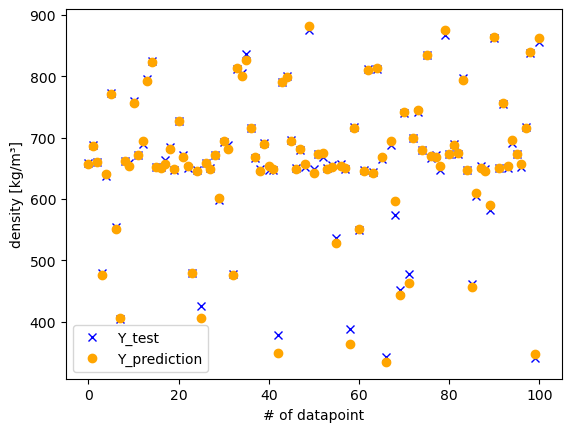

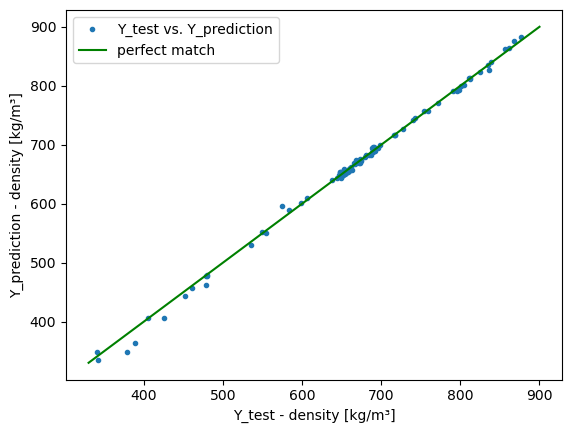

In [9]:
#print(f'{len(Y_test.to_numpy())}')
#print(f'{len(Y_prediction)}')
plt.plot(Y_test.to_numpy(), 'x', color='blue', label='Y_test')
plt.plot(Y_prediction, 'o', color='orange', label='Y_prediction')
plt.xlabel('# of datapoint')
plt.ylabel('density [kg/m³]')
plt.legend()

plt.figure()
plt.plot(Y_test.to_numpy(), Y_prediction, '.', label='Y_test vs. Y_prediction')
plt.plot([330, 900], [330, 900], color='green', label='perfect match')
plt.xlabel('Y_test - density [kg/m³]')
plt.ylabel('Y_prediction - density [kg/m³]')
plt.legend()

plt.show()

### testdata1 plot

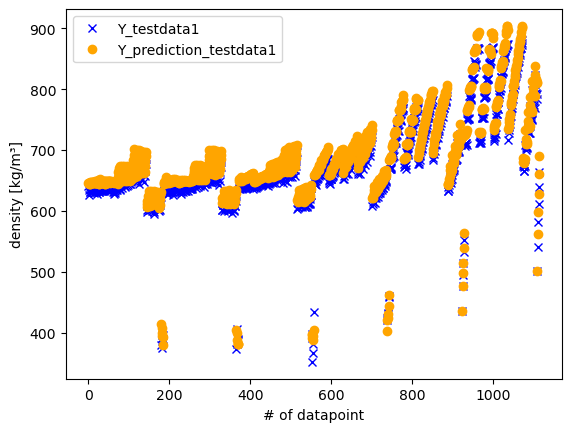

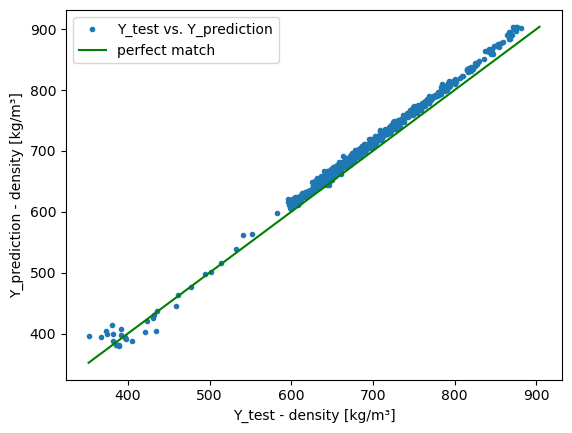

In [10]:
#print(f'{len(Y_testdata1.to_numpy())}')
#print(f'{len(Y_prediction_testdata1)}')
#print(f'{Y_testdata1.to_numpy()}')
#print(f'{Y_prediction_testdata1}')

plt.plot(Y_testdata1.to_numpy(), 'x', color='blue', label='Y_testdata1')
plt.plot(Y_prediction_testdata1, 'o', color='orange', label='Y_prediction_testdata1')
plt.xlabel('# of datapoint')
plt.ylabel('density [kg/m³]')
plt.legend()

plt.figure()
dens_min = min(min(Y_testdata1.to_numpy()), min(Y_prediction_testdata1))
dens_max = max(max(Y_testdata1.to_numpy()), max(Y_prediction_testdata1))
plt.plot(Y_testdata1.to_numpy(), Y_prediction_testdata1, '.', label='Y_test vs. Y_prediction')
plt.plot([dens_min, dens_max], [dens_min, dens_max], color='green', label='perfect match')
plt.xlabel('Y_test - density [kg/m³]')
plt.ylabel('Y_prediction - density [kg/m³]')
plt.legend()

plt.show()

### testdata2 plot

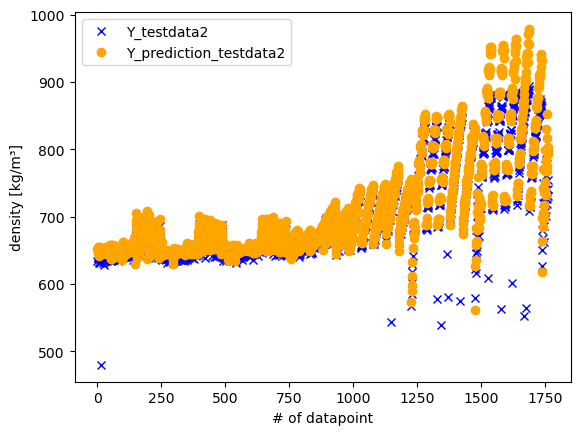

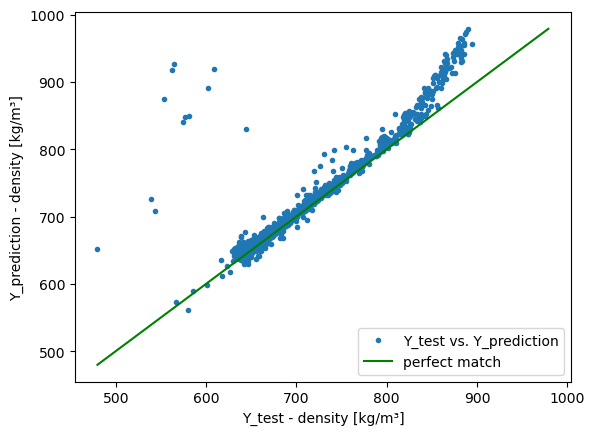

In [11]:
#print(f'{len(Y_testdata2.to_numpy())}')
#print(f'{len(Y_prediction_testdata2)}')
#print(f'{Y_testdata2.to_numpy()}')
#print(f'{Y_prediction_testdata2}')

plt.plot(Y_testdata2.to_numpy(), 'x', color='blue', label='Y_testdata2')
plt.plot(Y_prediction_testdata2, 'o', color='orange', label='Y_prediction_testdata2')
plt.xlabel('# of datapoint')
plt.ylabel('density [kg/m³]')
plt.legend()

plt.figure()
dens_min = min(min(Y_testdata2.to_numpy()), min(Y_prediction_testdata2))
dens_max = max(max(Y_testdata2.to_numpy()), max(Y_prediction_testdata2))
plt.plot(Y_testdata2.to_numpy(), Y_prediction_testdata2, '.', label='Y_test vs. Y_prediction')
plt.plot([dens_min, dens_max], [dens_min, dens_max], color='green', label='perfect match')
plt.xlabel('Y_test - density [kg/m³]')
plt.ylabel('Y_prediction - density [kg/m³]')
plt.legend()

plt.show()

### combined data plot

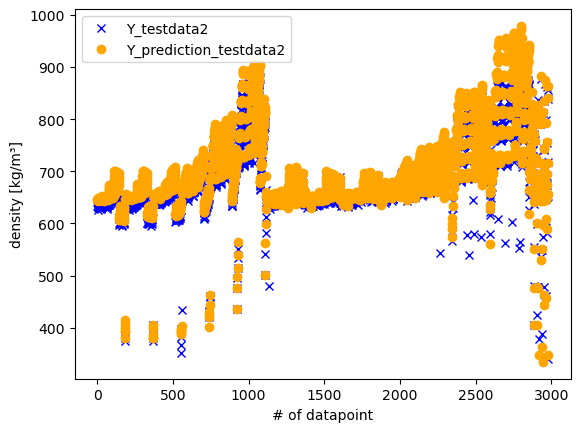

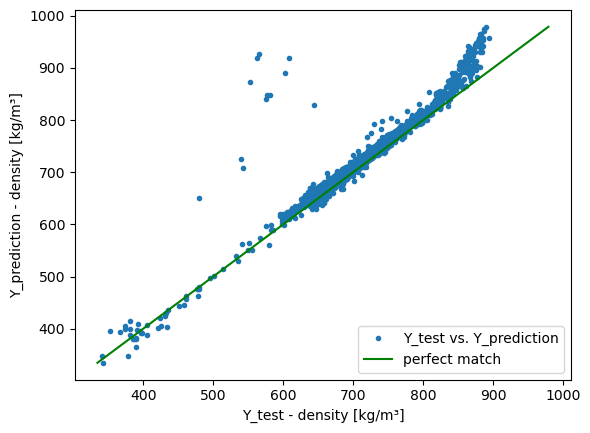

In [12]:
#print(f'{len(Y_testdata.to_numpy())}')
#print(f'{len(Y_prediction_testdata)}')
#print(f'{Y_testdata.to_numpy()}')
#print(f'{Y_prediction_testdata}')

plt.plot(Y_testdata.to_numpy(), 'x', color='blue', label='Y_testdata2')
plt.plot(Y_prediction_testdata, 'o', color='orange', label='Y_prediction_testdata2')
plt.xlabel('# of datapoint')
plt.ylabel('density [kg/m³]')
plt.legend()

plt.figure()
dens_min = min(min(Y_testdata.to_numpy()), min(Y_prediction_testdata))
dens_max = max(max(Y_testdata.to_numpy()), max(Y_prediction_testdata))
plt.plot(Y_testdata.to_numpy(), Y_prediction_testdata, '.', label='Y_test vs. Y_prediction')
plt.plot([dens_min, dens_max], [dens_min, dens_max], color='green', label='perfect match')
plt.xlabel('Y_test - density [kg/m³]')
plt.ylabel('Y_prediction - density [kg/m³]')
plt.legend()

plt.show()